## 청년 AI.Big Data 아카데미 예측분석

In [1]:
import matplotlib

# 맑은 고딕 적용
matplotlib.rc("font", family = "Malgun Gothic")
# 음수 표시
matplotlib.rc('axes', unicode_minus=False)

In [2]:
# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

### 단순선형 회귀분석 연습(24 Page)

In [3]:
# 25 Page
# 데이터 처리
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# 선형 회귀분석모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 회귀분석의 정규성 확인
from statsmodels.api import qqplot

In [4]:
# 맑은 고딕 적용
matplotlib.rc("font", family = "Malgun Gothic")
# 음수 표시
matplotlib.rc("axes", unicode_minus = False)

In [5]:
# 26 Page
df_raw = pd.read_csv("Big Data 분석/부품수리시간.CSV")
df_raw.head()

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [6]:
# 요약통계량
df_raw.describe().round(3)

,UNITS,MINUTES
count,14.000,14.000
mean,6.000,97.214
std,2.961,46.217
min,1.000,23.000
25%,4.000,66.500
50%,6.000,96.500
75%,8.750,138.500
max,10.000,166.000


<AxesSubplot:xlabel='UNITS', ylabel='MINUTES'>

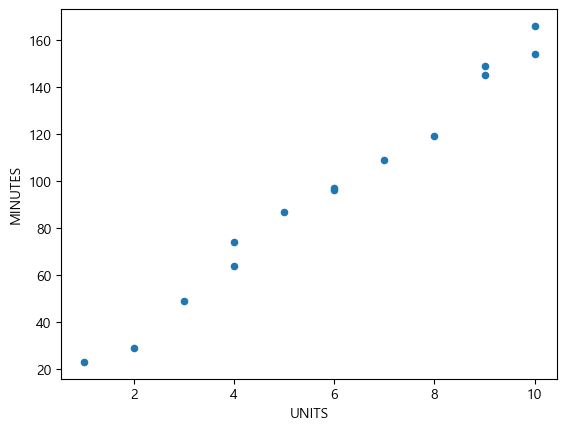

In [7]:
# 27 Page
# 목표변수와 설명변수의 산점도
df_raw.plot.scatter(x = "UNITS", y = "MINUTES")

In [8]:
# 목표변수와 설명변수의 상관계수
df_raw.corr(method = "pearson").round(3)

,UNITS,MINUTES
UNITS,1.000,0.994
MINUTES,0.994,1.000


In [9]:
# 28 Page
# 선형 회귀 분석 : formula(y ~ X1 + X2 + ...) 이용. 상수항(Intercept)은 자동으로 추가됨
reg_model = smf.ols(formula = "MINUTES ~ UNITS", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           8.92e-13
Time:                        17:38:12   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1617      3.355      1.240      0.2

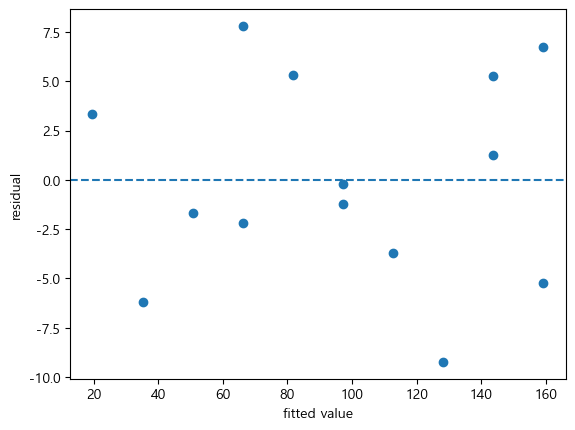

In [10]:
# 29 Page
# 잔차 산점도: X-예측값, Y-잔차 
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value"); plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--")

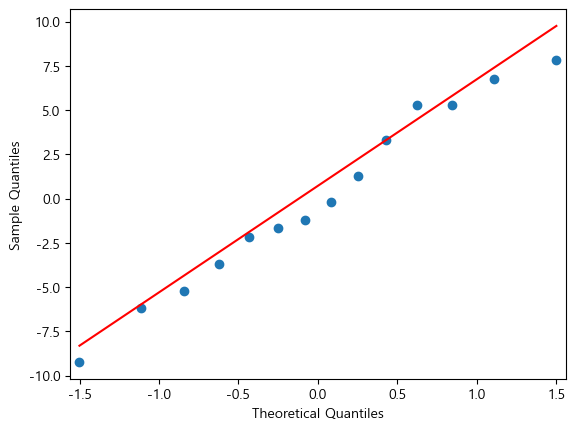

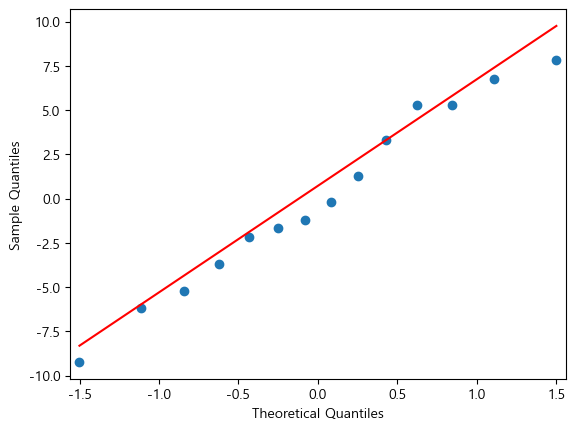

In [11]:
# 잔차 정규성 검정:Q-Q plot. s-standardized line, 
#  r-regression line, q-quartiles
qqplot(reg_result.resid, line = "q")

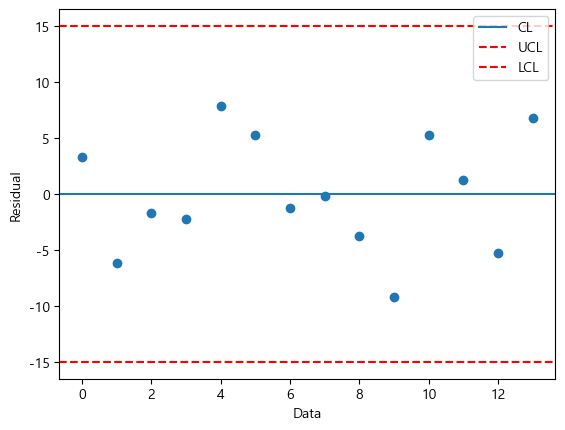

In [12]:
# 30 Page
# 잔차의 독립성 확인
plt.scatter(df_raw.index, reg_result.resid, marker="o")
plt.xlabel("Data") ; plt.ylabel("Residual")
plt.axhline(y=0,linestyle="-", label='CL')
plt.axhline(y=3*np.std(reg_result.resid),linestyle="--",color="red",label='UCL' )
plt.axhline(y=-3*np.std(reg_result.resid),linestyle="dashed",color="red",label='LCL')
plt.legend() ; plt.show()

### 다중선형회귀분석 (44 Page)

In [13]:
# 45 Page
# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# 선형 회귀모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 잔차의 정규성 확인 :qqplot, 회귀분석의 상수항 추가 : add_constant
from statsmodels.api import qqplot, add_constant
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 학습용/평가용 데이터 분리:train, test
from sklearn.model_selection import train_test_split
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환->표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from sklearn.metrics import r2_score

In [14]:
# 46 Page
# 맑은 고딕 적용
matplotlib.rc("font", family = "Malgun Gothic")
# 음수 표시
matplotlib.rc("axes", unicode_minus = False)

In [15]:
df_raw = pd.read_csv("Big Data 분석/체질검사.CSV", encoding = 'euc-kr')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER
0,35.2,46,363.15 lb,72.25 inch,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,남성
1,11.8,27,168 lb,71.25 inch,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,남성
2,22.2,69,177.75 lb,68.5 inch,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,남성
3,10.6,57,147.75 lb,65.75 inch,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,여성
4,47.5,51,219 lb,64 inch,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,여성


In [16]:
# 47 Page
# 결측치 확인
df_raw.isnull().sum()

FAT        0
AGE        0
WEIGHT     0
HEIGHT     0
NECK       0
CHEST      0
ABDOMEN    0
HIP        0
THIGH      0
KNEE       0
ANKLE      0
BICEPS     0
FOREARM    0
WRIST      0
GENDER     0
dtype: int64

In [17]:
# 단위와 같이 표현되어 있는 수치형 변수 처리
df_raw[['WEIGHT', 'WEIGHT_UNIT']] = df_raw['WEIGHT'].str.split(expand = True)
df_raw[['HEIGHT', 'HEIGHT_UNIT']] = df_raw['HEIGHT'].str.split(expand = True)
df_raw['WEIGHT'] = df_raw['WEIGHT'].astype('float64')
df_raw['HEIGHT'] = df_raw['HEIGHT'].astype('float64')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FAT          252 non-null    float64
 1   AGE          252 non-null    int64  
 2   WEIGHT       252 non-null    float64
 3   HEIGHT       252 non-null    float64
 4   NECK         252 non-null    float64
 5   CHEST        252 non-null    float64
 6   ABDOMEN      252 non-null    float64
 7   HIP          252 non-null    float64
 8   THIGH        252 non-null    float64
 9   KNEE         252 non-null    float64
 10  ANKLE        252 non-null    float64
 11  BICEPS       252 non-null    float64
 12  FOREARM      252 non-null    float64
 13  WRIST        252 non-null    float64
 14  GENDER       252 non-null    object 
 15  WEIGHT_UNIT  252 non-null    object 
 16  HEIGHT_UNIT  252 non-null    object 
dtypes: float64(13), int64(1), object(3)
memory usage: 33.6+ KB


In [18]:
# 단위를 나타내는 항목 제외
df_raw = df_raw.drop(['WEIGHT_UNIT', 'HEIGHT_UNIT'], axis = 1)
# 범주형 변수의 Dummy 변수화
df_raw_dummy = pd.get_dummies(df_raw, drop_first = True)
df_raw_dummy.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER_여성
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,0
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,0
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,0
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,1
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,1


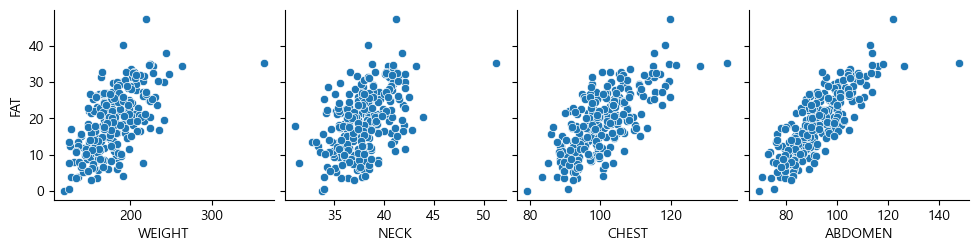

In [19]:
# 48 Page
# 산점도 행렬:목표변수와 설명변수 지정
sns.pairplot(df_raw_dummy, y_vars="FAT", x_vars=["WEIGHT", "NECK", "CHEST", "ABDOMEN"])

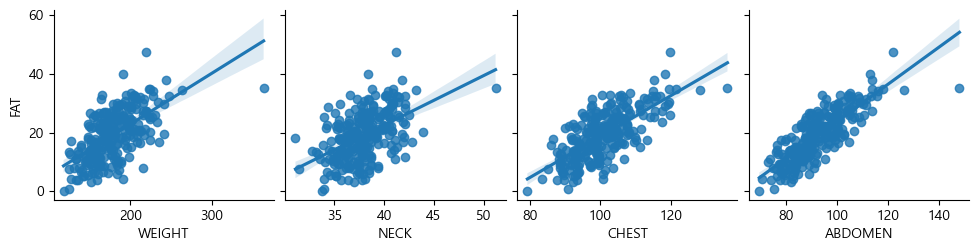

In [20]:
# 회귀 적합선 추가 : kind ="reg" 
sns.pairplot(df_raw_dummy, y_vars="FAT", x_vars=["WEIGHT", "NECK", "CHEST", "ABDOMEN"], kind="reg")

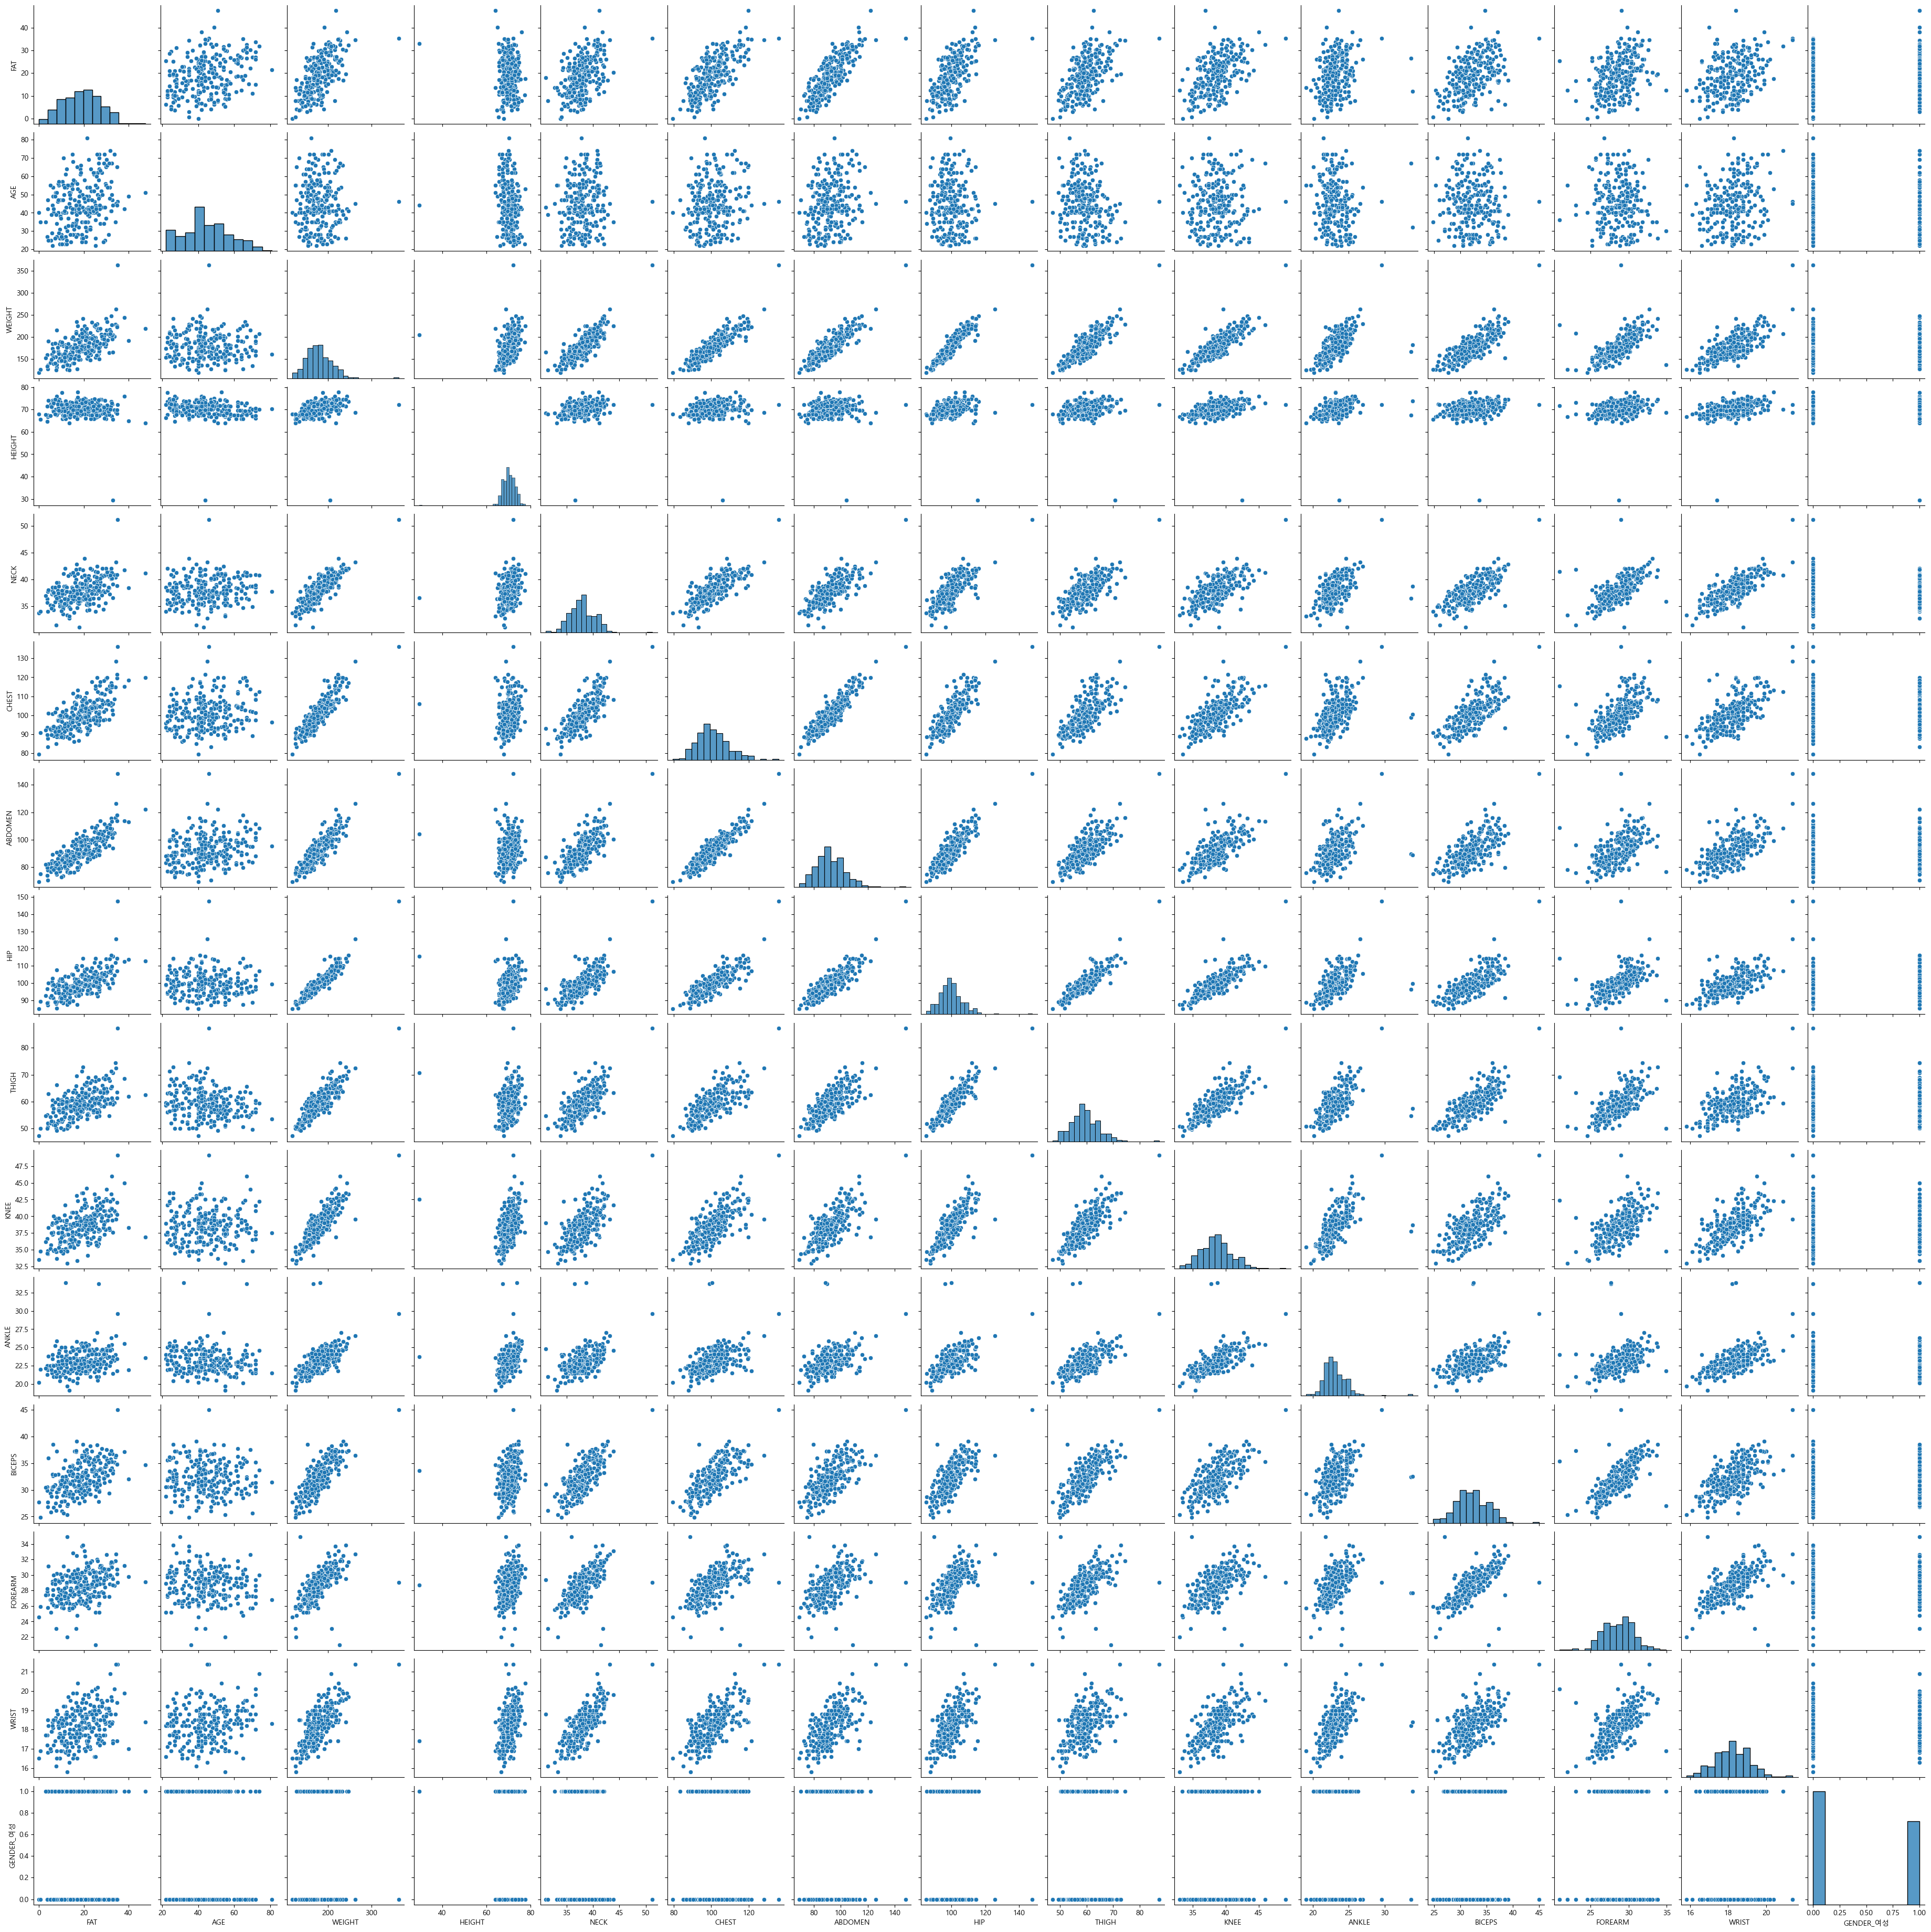

In [21]:
# 49 Page
# 산점도 행렬:전체 숫자형 변수
sns.pairplot(df_raw_dummy)

In [22]:
# 50 Page
# 상관관계 분석
df_raw_dummy.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER_여성
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347,-0.033
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214,-0.063
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730,-0.009
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322,0.025
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745,0.010
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660,-0.014
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620,-0.017
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630,-0.042
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559,-0.040
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665,-0.034


In [23]:
# 51 Page
# train/test data 분리
df_train, df_test = train_test_split(df_raw_dummy, test_size = 0.3, random_state = 1234) 
print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (176, 15)
test data size : (76, 15)


In [24]:
# 선형 회귀 분석 : formula(y ~ X1 + X2 + ...) 이용. 상수항(Intercept) 자동 추가. 코드 중간에서 줄 바꿈 “\” 추가
reg_model = smf.ols(formula = "FAT ~ AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + \
            KNEE + ANKLE + BICEPS + FOREARM + WRIST + GENDER_여성", data = df_train)
# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     38.25
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           6.43e-44
Time:                        17:40:41   Log-Likelihood:                -495.19
No. Observations:                 176   AIC:                             1020.
Df Residuals:                     161   BIC:                             1068.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.8459     20.984     -1.708      0.0

In [25]:
# 53 Page
# 설명변수간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_train_x = df_train.drop('FAT', axis = 1)
# statsmodels의 상수항 추가 함수 적용
df_train_x_const = add_constant(df_train_x) 
# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) \
                 for i in range(df_train_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values("VIF", ascending = True).round(2)

,variable,VIF
14,GENDER_여성,1.04
3,HEIGHT,1.65
12,FOREARM,2.03
10,ANKLE,2.23
1,AGE,2.43
11,BICEPS,3.46
13,WRIST,3.52
4,NECK,4.29
9,KNEE,5.14
8,THIGH,9.02


In [26]:
# 54 Page
# 선형 회귀 분석 : 모델에서 WEIGHT 제거
reg_model = smf.ols(formula = "FAT ~ AGE + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + \
            KNEE + ANKLE + BICEPS + FOREARM + WRIST + GENDER_여성", data = df_train)
# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     40.16
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           6.67e-44
Time:                        17:41:01   Log-Likelihood:                -497.32
No. Observations:                 176   AIC:                             1023.
Df Residuals:                     162   BIC:                             1067.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1903      8.664      0.253      0.8

In [27]:
# 55 Page
# 다중공선성 재확인
df_train_x = df_train.drop(["FAT","WEIGHT"], axis = 1)

# statsmodels의 상수항 추가 함수 적용
df_train_x_const = add_constant(df_train_x) 

# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["Variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) \
                 for i in range(df_train_x_const.shape[1])]

# VIF 정렬
df_vif.sort_values("VIF", ascending = True).round(2)

,Variable,VIF
13,GENDER_여성,1.04
2,HEIGHT,1.36
11,FOREARM,2.03
9,ANKLE,2.11
1,AGE,2.34
10,BICEPS,3.37
12,WRIST,3.42
3,NECK,3.81
8,KNEE,4.65
4,CHEST,8.81


In [28]:
# 56 Page
# 선형 회귀 분석(유의하지 않은 변수 중 p-value가 가장 큰 것을 하나씩 반복적으로 제거)
reg_model = smf.ols(formula = "FAT ~ HEIGHT + NECK + ABDOMEN + HIP + FOREARM", data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     102.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           2.18e-49
Time:                        17:41:15   Log-Likelihood:                -501.89
No. Observations:                 176   AIC:                             1016.
Df Residuals:                     170   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7817      7.302      0.381      0.7

In [29]:
# 57 Page
# 설명변수간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_train_x = df_train[["HEIGHT","NECK", "ABDOMEN", "HIP", "FOREARM"]]
# statsmodels의 상수항 추가 함수 적용
df_train_x_const = add_constant(df_train_x) 
# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) for i in range(df_train_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values('VIF', inplace = True)
df_vif.round(2)

,variable,VIF
1,HEIGHT,1.14
5,FOREARM,1.57
2,NECK,2.87
3,ABDOMEN,4.91
4,HIP,4.95
0,const,516.31


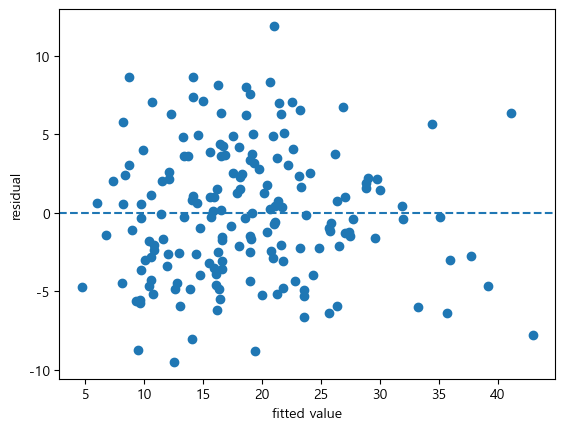

In [30]:
# 58 Page
# 잔차 산점도: X-예측값, Y-잔차 
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--")

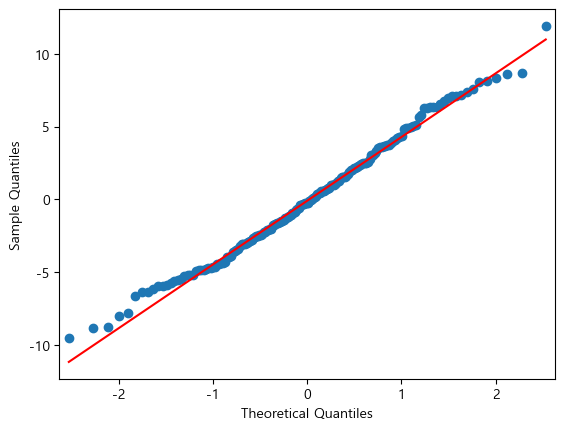

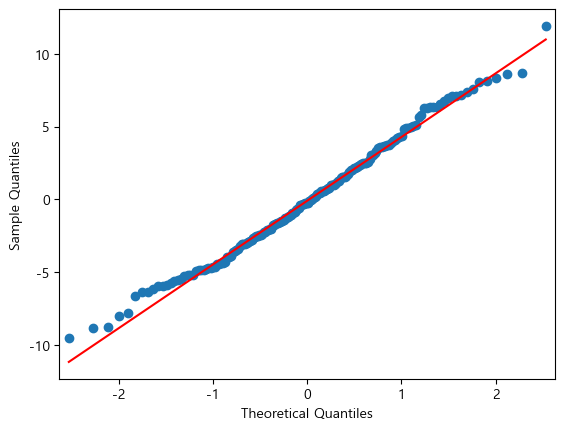

In [31]:
# 잔차 정규성 검정:Q-Q plot. s-standardized line, 
#  r-regression line, q-quartiles
qqplot(reg_result.resid, line = "q")

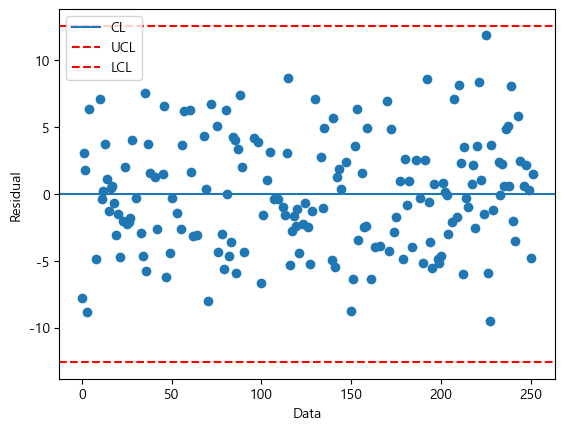

In [32]:
# 59 Page
# 잔차의 독립성 확인
plt.scatter(df_train.index, reg_result.resid)
plt.xlabel("Data")  ;  plt.ylabel("Residual")
plt.axhline(y=0,linestyle="-", label='CL')
plt.axhline(y=3*np.std(reg_result.resid),linestyle="--",color="red",label='UCL' )
plt.axhline(y=-3*np.std(reg_result.resid),linestyle="dashed",color="red",label='LCL')
plt.legend()

In [33]:
# 60 Page
# 평가용 데이터에 대한 성능 확인
train_pred = reg_result.predict(df_train)
test_pred = reg_result.predict(df_test)
print("train data의 결정계수:", r2_score(df_train['FAT'], train_pred))
print("test data의 결정계수:", r2_score(df_test['FAT'], test_pred))

train data의 결정계수: 0.7505481797941164
test data의 결정계수: 0.6575253938890123


In [34]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
print('test data의 실제값 : \n', df_test['FAT'].head(10))
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 208     8.0
94      9.6
31     34.3
248    23.6
216    31.4
6      23.3
91      5.2
73     12.5
129    13.9
5      24.2
Name: FAT, dtype: float64
test data의 예측값 : 
 208    13.686776
94     17.300433
31     36.053977
248    19.637927
216    22.717339
6      18.350734
91     14.782581
73     12.623424
129    15.831971
5      24.912352
dtype: float64


In [35]:
# 61 Page
# RFE(recursive feature elimination) 함수 : 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적으로 제거
# 목표변수/설명변수 분리
df_train_y = df_train["FAT"]
df_train_x = df_train.drop('FAT', axis = 1)
# sklearn의 선형회귀 모델
model = LinearRegression()
# 전체 변수 중 5개의 변수가 남을 때까지 변수 선택
rfe = RFE(estimator = model, n_features_to_select = 5).fit(df_train_x, df_train_y)
# 선택된 변수
selected_cols = df_train_x.columns[rfe.support_]
# 제거된 변수
removed_cols = df_train_x.columns[~rfe.support_]

print("Selected Variables : {}".format(selected_cols)) 
print("Removed Variables : {}".format(removed_cols))

Selected Variables : Index(['NECK', 'ABDOMEN', 'ANKLE', 'FOREARM', 'WRIST'], dtype='object')
Removed Variables : Index(['AGE', 'WEIGHT', 'HEIGHT', 'CHEST', 'HIP', 'THIGH', 'KNEE', 'BICEPS',
       'GENDER_여성'],
      dtype='object')


In [36]:
# 62 Page
# 회귀 모델 생성
rfe_reg_model = smf.ols(formula = "FAT ~ NECK + ABDOMEN + ANKLE+ FOREARM + WRIST", data = df_train)
# 적합
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     89.26
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           1.07e-45
Time:                        17:42:21   Log-Likelihood:                -510.73
No. Observations:                 176   AIC:                             1033.
Df Residuals:                     170   BIC:                             1052.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.3447      6.993     -1.336      0.1

<AxesSubplot:>

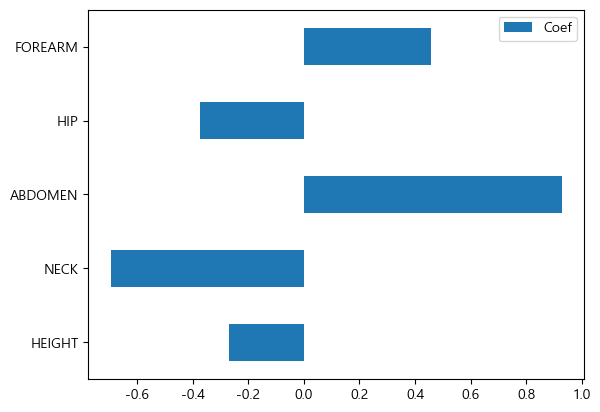

In [37]:
# 63 Page
# 설명변수 중요도
df_reg_coef = pd.DataFrame({"Coef": reg_result.params.values[1:]},  
                           index = ['HEIGHT','NECK','ABDOMEN','HIP','FOREARM'])
df_reg_coef.plot.barh(y = "Coef")